In [2]:
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [3]:
pwd = os.getcwd()
pwd

'c:\\Users\\pih\\OneDrive - Capital Four Management Fondsmæglerselskab A S\\notesPH\\personal\\school\\dtu\\compData\\case2\\compDataAnProject'

In [4]:
def load_csv_data(folder_path, file_name):
    file_path = f"{folder_path}/{file_name}"
    return pd.read_csv(file_path)

def load_excel_data(folder_path, file_name):
    file_path = f"{folder_path}/{file_name}"
    return pd.read_excel(file_path)

In [5]:
def combine_data(data_path):
    combined_data = []
    
    for day_folder in sorted(os.listdir(data_path)):
        day_path = os.path.join(data_path, day_folder)
        if not os.path.isdir(day_path):
            continue
            
        if day_folder == "D1_3":
            for d1_3_subfolder in sorted(os.listdir(day_path)):
                d1_3_subfolder_path = os.path.join(day_path, d1_3_subfolder)
                if not os.path.isdir(d1_3_subfolder_path):
                    continue
                
                for id_folder in sorted(os.listdir(d1_3_subfolder_path)):
                    process_id_folder(d1_3_subfolder_path, id_folder, combined_data)
        else:
            for id_folder in sorted(os.listdir(day_path)):
                process_id_folder(day_path, id_folder, combined_data)
                
    return combined_data

def process_id_folder(day_path, id_folder, combined_data):
    id_path = os.path.join(day_path, id_folder)
    if not os.path.isdir(id_path):
        return

    for round_folder in sorted(os.listdir(id_path)):
        round_path = os.path.join(id_path, round_folder)
        if not os.path.isdir(round_path):
            continue

        for phase_folder in sorted(os.listdir(round_path)):
            phase_path = os.path.join(round_path, phase_folder)
            if not os.path.isdir(phase_path):
                continue

            #print(f"Processing: {phase_path}")

            bvp_data = load_csv_data(phase_path, "BVP.csv")
            eda_data = load_csv_data(phase_path, "EDA.csv")
            hr_data = load_csv_data(phase_path, "HR.csv")
            temp_data = load_csv_data(phase_path, "TEMP.csv")
            response_data = load_csv_data(phase_path, "response.csv")

            combined_data.append({
                'day': os.path.split(day_path)[-1],
                'id': os.path.split(id_path)[-1],
                'round': os.path.split(round_path)[-1],
                'phase': os.path.split(phase_path)[-1],
                'bvp': bvp_data,
                'eda': eda_data,
                'hr': hr_data,
                'temp': temp_data,
                'response': response_data
            })

data_path = os.path.join(pwd, 'dataset')
combined_data = combine_data(data_path)

In [6]:
combined_dataframe = pd.DataFrame.from_records(combined_data)

def flatten_dataframe(combined_dataframe):
    flattened_data = []
    
    for index, row in combined_dataframe.iterrows():
        data_dict = {
            'day': row['day'],
            'id': row['id'],
            'round': row['round'],
            'phase': row['phase'],
            'bvp': row['bvp'],
            'eda': row['eda'],
            'hr': row['hr'],
            'temp': row['temp']
        }
        
        # Extract questionnaire data
        for col in row['response'].columns:
            data_dict[col] = row['response'].iloc[0][col]
        
        flattened_data.append(data_dict)

    return pd.DataFrame(flattened_data)


flattened_dataframe = flatten_dataframe(combined_dataframe)

In [7]:
flattened_dataframe.head()

,day,id,round,phase,bvp,eda,hr,temp,Unnamed: 0,particpant_ID,...,inspired,nervous,determined,attentive,afraid,active,frustrated,difficulty,participant_ID,parent
0,D1_1,ID_1,round_1,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,0,7.0,...,2.0,2.0,3.0,3.0,1.0,2.0,1.0,NaN,NaN,NaN
1,D1_1,ID_1,round_1,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,0,7.0,...,3.0,1.0,3.0,2.0,1.0,3.0,2.0,5.0,NaN,NaN
2,D1_1,ID_1,round_1,phase3,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,0,7.0,...,2.0,1.0,2.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
3,D1_1,ID_1,round_2,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,0,7.0,...,2.0,1.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN,NaN
4,D1_1,ID_1,round_2,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,0,7.0,...,2.0,1.0,3.0,3.0,1.0,3.0,1.0,2.0,NaN,NaN


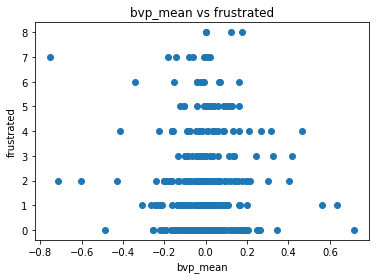

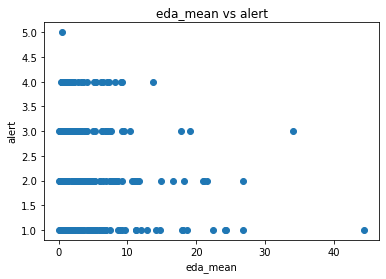

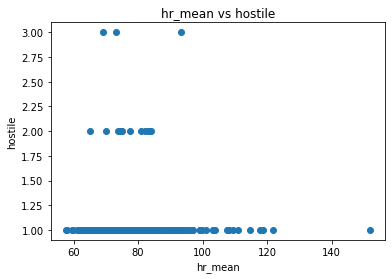

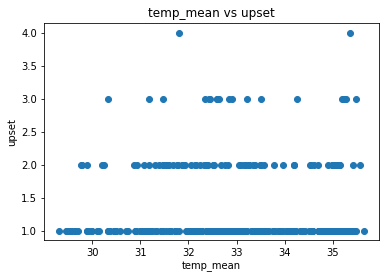

In [8]:
def plot_scatter(df, biosignal, emotion):
    plt.scatter(df[biosignal], df[emotion])
    plt.xlabel(biosignal)
    plt.ylabel(emotion)
    plt.title(f'{biosignal} vs {emotion}')
    plt.show()

# Calculate the mean of the biosignals before plotting
flattened_dataframe['bvp_mean'] = flattened_dataframe['bvp'].apply(lambda x: x.iloc[:, 1].mean())
flattened_dataframe['eda_mean'] = flattened_dataframe['eda'].apply(lambda x: x.iloc[:, 1].mean())
flattened_dataframe['hr_mean'] = flattened_dataframe['hr'].apply(lambda x: x.iloc[:, 1].mean())
flattened_dataframe['temp_mean'] = flattened_dataframe['temp'].apply(lambda x: x.iloc[:, 1].mean())

# Plot scatter plots for different combinations of biosignals and emotions
plot_scatter(flattened_dataframe, 'bvp_mean', 'frustrated')
plot_scatter(flattened_dataframe, 'eda_mean', 'alert')
plot_scatter(flattened_dataframe, 'hr_mean', 'hostile')
plot_scatter(flattened_dataframe, 'temp_mean', 'upset')

In [9]:
combined_dataframe

,day,id,round,phase,bvp,eda,hr,temp,response
0,D1_1,ID_1,round_1,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
1,D1_1,ID_1,round_1,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
2,D1_1,ID_1,round_1,phase3,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
3,D1_1,ID_1,round_2,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
4,D1_1,ID_1,round_2,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
...,...,...,...,...,...,...,...,...,...
304,D1_3_4,ID_2,round_3,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 participant_ID parent team_ID...
305,D1_3_4,ID_2,round_3,phase3,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 participant_ID parent team_ID...
306,D1_3_4,ID_2,round_4,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 participant_ID parent team_ID...
307,D1_3_4,ID_2,round_4,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 participant_ID parent team_ID...
